In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [2.0, 3.0],
    [3.0, 2.0]
])

y = np.array([0, 0, 1, 1])


In [5]:
w = np.zeros(2)   # one weight per feature
b = 0

In [6]:
z = X @ w + b

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
z = X @ w + b
y_prob = sigmoid(z)

In [9]:
dw = (1 / len(X)) * X.T.dot(y_prob - y)
db = (1 / len(X)) * np.sum(y_prob - y)
print("dw:", dw)
print("db:", db)

dw: [-0.25 -0.25]
db: 0.0


In [10]:
lr = 0.1

w = w - lr * dw
b = b - lr * db

print("w:", w)
print("b:", b)

w: [0.025 0.025]
b: 0.0


In [11]:
z = X @ w + b
y_prob = sigmoid(z)

print("z:", z)
print("prob:", y_prob)

z: [0.075 0.075 0.125 0.125]
prob: [0.51874122 0.51874122 0.53120937 0.53120937]


In [12]:
y_pred = (y_prob >= 0.5).astype(int)
print("prediction:", y_pred)

prediction: [1 1 1 1]


## COST FUNCTION

In [13]:
def calculate_cost(y, y_prob, m):
    return -(1/m) * np.sum((y * np.log(y_prob)) + ((1-y) * np.log(1 - y_prob)))

In [15]:
epochs = 200
lr = 0.1                                   
w = np.zeros(2)   # one weight per feature
b = 0
cost_history = []
for epoch in range(epochs):
    z = X.dot(w) + b
    print(f"{epoch} Iteration: {z}")
    y_prob = sigmoid(z)
    cost = calculate_cost(y, y_prob, len(X))
    cost_history.append(cost)
    print(f"{epoch} Iteration Cost: {cost}")
    dw = (1 / len(X)) * X.T.dot(y_prob - y)
    db = (1 / len(X)) * np.sum(y_prob - y)

    w -= lr * dw
    b -= lr * db

print(f"Final w: {w}")
print(f"Final b: {b}")   
final_z = X.dot(w) + b
final_prob = sigmoid(final_z)
final_pred = (final_prob >= 0.5).astype(int)
print(f"Final prob: {final_prob}")
print(f"Final pred: {(final_prob >= 0.5).astype(int)}")


0 Iteration: [0. 0. 0. 0.]
0 Iteration Cost: 0.6931471805599453
1 Iteration: [0.075 0.075 0.125 0.125]
1 Iteration Cost: 0.6819745880719821
2 Iteration: [0.13158218 0.13158218 0.22096866 0.22096866]
2 Iteration Cost: 0.6749274074090382
3 Iteration: [0.17416608 0.17416608 0.29487071 0.29487071]
3 Iteration Cost: 0.6702792175383072
4 Iteration: [0.20611738 0.20611738 0.35201021 0.35201021]
4 Iteration Cost: 0.667029352483946
5 Iteration: [0.22997716 0.22997716 0.39639159 0.39639159]
5 Iteration Cost: 0.6645986722089601
6 Iteration: [0.24766188 0.24766188 0.43103488 0.43103488]
6 Iteration Cost: 0.6626508466215356
7 Iteration: [0.2606203  0.2606203  0.45822297 0.45822297]
7 Iteration Cost: 0.6609895274091508
8 Iteration: [0.26995156 0.26995156 0.47968779 0.47968779]
8 Iteration Cost: 0.6594994488074473
9 Iteration: [0.27649277 0.27649277 0.49674831 0.49674831]
9 Iteration Cost: 0.658112593415882
10 Iteration: [0.28088376 0.28088376 0.51041265 0.51041265]
10 Iteration Cost: 0.6567886423021

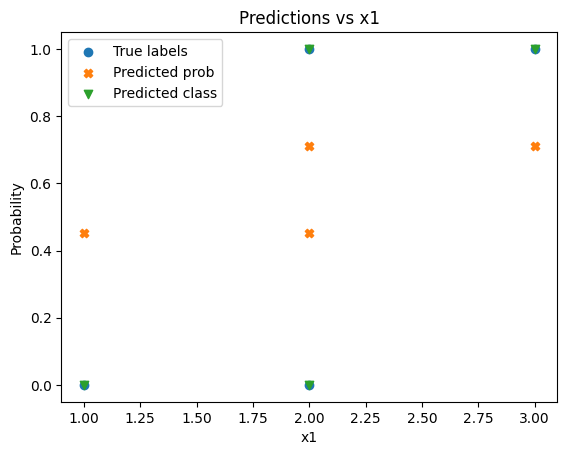

In [19]:
plt.figure()

plt.scatter(X[:,0], y, label="True labels")
plt.scatter(X[:,0], final_prob, marker="X", label="Predicted prob")
plt.scatter(X[:,0], final_pred, marker="v", label="Predicted class")
plt.xlabel("x1")
plt.ylabel("Probability")
plt.title("Predictions vs x1")
plt.legend()
plt.show()

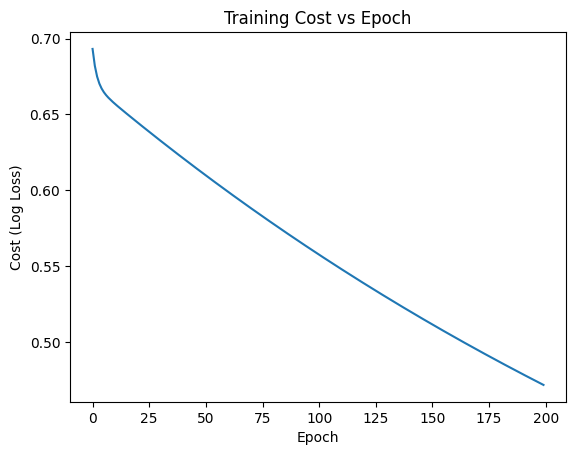

In [18]:
plt.figure()
plt.plot(cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost (Log Loss)")
plt.title("Training Cost vs Epoch")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

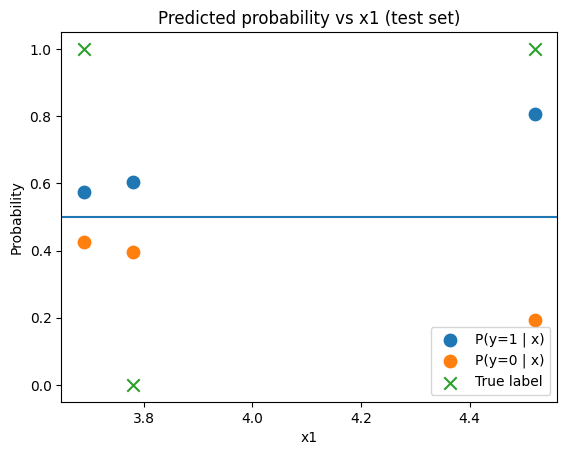

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_proba = log_reg.predict_proba(X_test)
plt.figure()

plt.scatter(X_test, y_proba[:, 1], label="P(y=1 | x)", s=80)
plt.scatter(X_test, y_proba[:, 0], label="P(y=0 | x)", s=80)

plt.scatter(X_test, y_test, label="True label", marker="x", s=80)

plt.axhline(0.5)
plt.xlabel("x1")
plt.ylabel("Probability")
plt.title("Predicted probability vs x1 (test set)")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import log_loss

cost = log_loss(y_test, y_proba)
cost

0.5652906437001335

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [66]:
X = iris.data[:, 3:] # petal width
y = (iris.target == 2).astype(int)  # 1 if Iris-Virginica, else 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

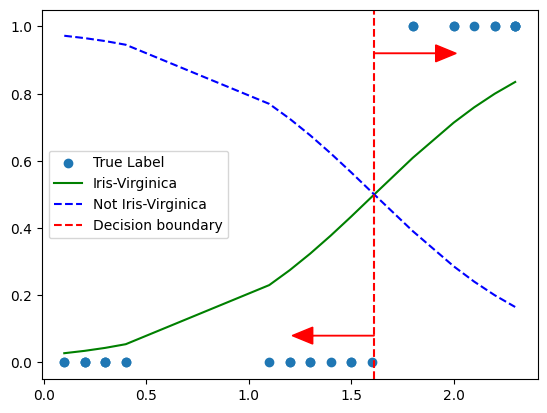

In [108]:
y_proba = log_reg.predict_proba(X_test)

sorted_idx = np.argsort(X_test[:, 0])
X_sorted = X_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
y_proba_sorted = y_proba[sorted_idx]

decision_boundary = -log_reg.intercept_[0] / log_reg.coef_[0][0]

plt.scatter(X_sorted, y_test_sorted, label="True Label")
plt.plot(X_sorted, y_proba_sorted[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_sorted, y_proba_sorted[:, 0],"b--", label="Not Iris-Virginica")
plt.axvline(decision_boundary, linestyle="--", color="red", label="Decision boundary")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')

plt.legend()
plt.show()

In [109]:
log_reg.coef_

array([[2.3558336]])